# ARIMA, SARIMA & SARIMAX

ARIMA es un modelo básico para el análisis de series de tiempo, mientras que SARIMA y SARIMAX extienden ARIMA para incluir componentes estacionales y variables exógenas, respectivamente. Estos modelos asumen que la serie de tiempo es estacionaria o puede convertirse en estacionaria mediante diferenciación. Si la serie de tiempo es altamente no estacionaria, puede ser necesario realizar transformaciones adicionales o considerar otros modelos. Pueden ser sensibles a los valores atípicos o anomalías en los datos.

In [ ]:
pip install pmdarima

## ARIMA

El modelo ARIMA combina tres componentes: el componente autoregresivo (AR), que tiene en cuenta las observaciones pasadas; el componente de media móvil (MA), que tiene en cuenta el error residual pasado; y el componente de integración (I), que se refiere a la diferenciación de la serie de tiempo para hacerla estacionaria.


Hay tres factores que se deben optimizar:

* Orden de diferenciación (d): Es la cantidad de veces que se deben aplicar
diferencias a la serie de tiempo para hacerla estacionaria. La diferenciación elimina las tendencias en los datos.

* Orden del componente autoregresivo (p): Representa cuántas observaciones pasadas se deben considerar para predecir el valor actual de la serie de tiempo. Cuanto mayor sea el valor de "p", más observaciones pasadas se tendrán en cuenta.

* Orden del componente de media móvil (q): Indica cuántos errores pasados se deben considerar para predecir el valor actual de la serie de tiempo. Un valor mayor de "q" implica tener en cuenta más errores pasados.


In [4]:
#import libraries
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("Churrasco.csv",
                   index_col = "Week",
                   parse_dates = True)
df.head()

,Churrasco,Easter,Carnaval,Republic
Week,,,,
2016-01-31,42,0,0,0
2016-02-07,45,0,1,0
2016-02-14,40,0,0,0
2016-02-21,36,0,0,0
2016-02-28,39,0,0,0


In [10]:
df = df.asfreq("W")
df.index

DatetimeIndex(['2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28', '2016-03-06', '2016-03-13', '2016-03-20',
               '2016-03-27', '2016-04-03',
               ...
               '2020-11-22', '2020-11-29', '2020-12-06', '2020-12-13',
               '2020-12-20', '2020-12-27', '2021-01-03', '2021-01-10',
               '2021-01-17', '2021-01-24'],
              dtype='datetime64[ns]', name='Week', length=261, freq='W-SUN')

<Axes: xlabel='Week'>

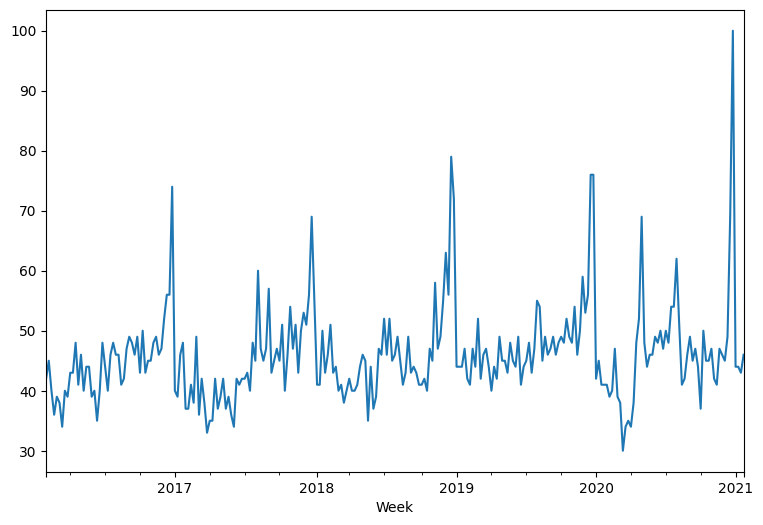

In [11]:
df.Churrasco.plot(figsize = (9,6))

## SARIMA





Extensión del modelo ARIMA que incorpora componentes estacionales.
Adecuado para modelar y predecir series de tiempo con patrones estacionales.
Además de los órdenes p, d y q, se especifican los órdenes P, D y Q para los componentes estacionales AR, I y MA, respectivamente, junto con la frecuencia de la estacionalidad.

 Stationarity

 La eliminación del componente estacional en una serie de tiempo tiene la ventaja de simplificar el análisis, permitir una mejor identificación de las tendencias a largo plazo y patrones irregulares, y mejorar la precisión de los pronósticos al eliminar los efectos estacionales que pueden distorsionar la dinámica subyacente de los datos.

## SARIMAX

* Versión ampliada de SARIMA que permite incorporar variables exógenas en el modelo.
* Las variables exógenas pueden ser factores externos que afectan la serie de tiempo objetivo.

## Data Preparation

#### Train and Test

In [12]:
test_weeks = 12
training_set = df.iloc[:-test_weeks, :]
test_set = df.iloc[-test_weeks:, :]
test_set.head()

,Churrasco,Easter,Carnaval,Republic
Week,,,,
2020-11-08,42,0,0,0
2020-11-15,41,0,0,1
2020-11-22,47,0,0,0
2020-11-29,46,0,0,0
2020-12-06,45,0,0,0


In [13]:
train_exog = training_set.iloc[:, 1:]
test_exog = test_set.iloc[:, 1:]

In [14]:
train_exog.head()

,Easter,Carnaval,Republic
Week,,,
2016-01-31,0,0,0
2016-02-07,0,1,0
2016-02-14,0,0,0
2016-02-21,0,0,0
2016-02-28,0,0,0


In [15]:
from pmdarima import auto_arima
model = auto_arima(y = training_set.Churrasco,
                   X = train_exog,
                   m = 52,
                   stepwise = True)           #validation param, busca el mejor modelo de ARIMA
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  249
Model:             SARIMAX(0, 0, 2)x(2, 0, [], 52)   Log Likelihood                -762.709
Date:                             Mon, 03 Jul 2023   AIC                           1543.417
Time:                                     22:02:43   BIC                           1575.074
Sample:                                 01-31-2016   HQIC                          1556.160
                                      - 11-01-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.2786      1.818      6.755      0.000       8.716      15.841
Easter         2.3324      2.242      1.040      0.298      -2.061       6.726
Carnaval       5.5811      2.825      1.976      0.048       0.045      11.118
Republic      19.1431      2.785      6.874      0.000      13.685      24.601
ma.L1          0.3459      0.059      5.872      0.000       0.230       0.461
ma.L2          0.2707      0.058      4.647      0.000       0.157       0.385
ar.S.L52       0.5197      0.062      8.319      0.000       0.397       0.642
ar.S.L104      0.2102      0.068      3.101      0.002       0.077       0.343
sigma2        23.3559      1.851     12.618      0.000      19.728      26.984
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                59.65
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                             0.74
Prob(H) (two-sided):                  0.55   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
predictions = pd.Series(model.predict(n_periods= test_weeks,
                        X = test_exog)).rename("SARIMAX")
predictions.index = test_set.index
predictions.head(10)

Week
2020-11-08    38.373076
2020-11-15    65.847238
2020-11-22    48.563909
2020-11-29    54.502500
2020-12-06    53.065839
2020-12-13    53.153570
2020-12-20    68.382374
2020-12-27    66.910974
2021-01-03    43.355227
2021-01-10    44.914358
Freq: W-SUN, Name: SARIMAX, dtype: float64

<Axes: xlabel='Week'>

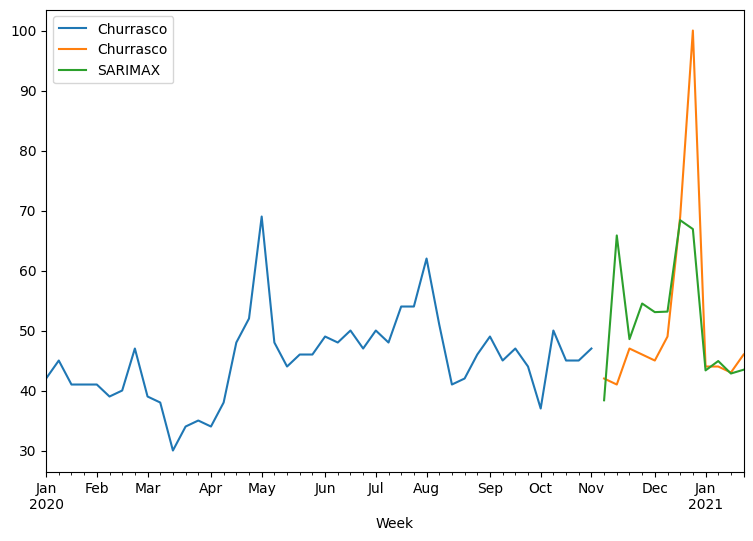

In [18]:

training_set.Churrasco['2020-01-01':].plot(legend = True,
                                           figsize = (9,6))
test_set.Churrasco.plot(legend = True)
predictions.plot(legend = True)

## Model Evaluation

#### MAPE

El MAPE se calcula como el promedio del valor absoluto de los errores porcentuales individuales entre las predicciones del modelo y los valores reales. Para cada punto de datos, se calcula el error porcentual como la diferencia absoluta entre la predicción y el valor real, dividido por el valor real, y luego se promedian todos los errores porcentuales.

El MAPE se expresa como un porcentaje y proporciona una medida relativa de la precisión del modelo. Cuanto menor sea el valor del MAPE, mejor será la precisión del modelo. Un MAPE del 0% indica una predicción perfecta, mientras que un MAPE del 100% indica que las predicciones del modelo tienen un error promedio igual al 100% de los valores reales.



In [22]:
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  print("Error porcentual promedio entre real y predict: ",np.mean(np.abs((y_true - y_pred) / y_true)) * 100, "%")
MAPE(test_set.Churrasco, predictions)

Error porcentual promedio entre real y predict:  13.405754173402363 %


## Anexo

### Casos prácticos

* Pronóstico de ventas: Estos modelos son utilizados para predecir las ventas futuras de productos o servicios. Pueden capturar patrones estacionales, tendencias y efectos de variables exógenas relacionadas con las ventas.

* Demanda de inventario: Ayudan a pronosticar la demanda futura de productos para optimizar los niveles de inventario y evitar problemas de exceso o falta de stock.

* Finanzas y economía: Se aplican en pronósticos de series financieras, como precios de acciones, tipos de cambio, índices económicos, entre otros. También se utilizan en análisis macroeconómicos y para modelar variables económicas clave.

* Planificación de la producción: Estos modelos pueden ser útiles para predecir la demanda de productos y planificar la producción en sectores como la manufactura, la industria alimentaria y la logística.